# Text Analytics - CISB5123
## Lab 10.1 - Text Visualization
Name: Abdul Hakiim bin Ahmad Rosli

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Read the CSV file
df = pd.read_csv('simple_dataset.csv')

In [3]:
# Initialize stemming and lemmatization objects
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_review(review):
    # Convert to lowercase
    review = review.lower()
    
    # Remove punctuations
    review = re.sub(r'[^\w\s]', '', review)
    
    # Remove numbers
    review = re.sub(r'\d+', '', review)
    
    # Tokenize words
    tokens = word_tokenize(review)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Perform stemming and lemmatization
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens into a single string
    preprocessed_review = ' '.join(lemmatized_tokens)
    
    return preprocessed_review

# Preprocess the reviews
df['preprocessed_text'] = df['text'].apply(preprocess_review)

In [4]:
display(df)

,category,text,preprocessed_text
0,Positive,I love this product! It works great and has ex...,love product work great excellent quality
1,Negative,Terrible experience. The product broke after o...,terrible experience product broke one use
2,Positive,Fantastic! I would highly recommend this to ev...,fantastic would highly recommend everyone
3,Negative,Awful. It was a complete waste of money.,awful complete waste money
4,Positive,Amazing product! Very satisfied with my purchase.,amazing product satisfied purchase
5,Negative,Do not buy this. It is not worth the price.,buy worth price


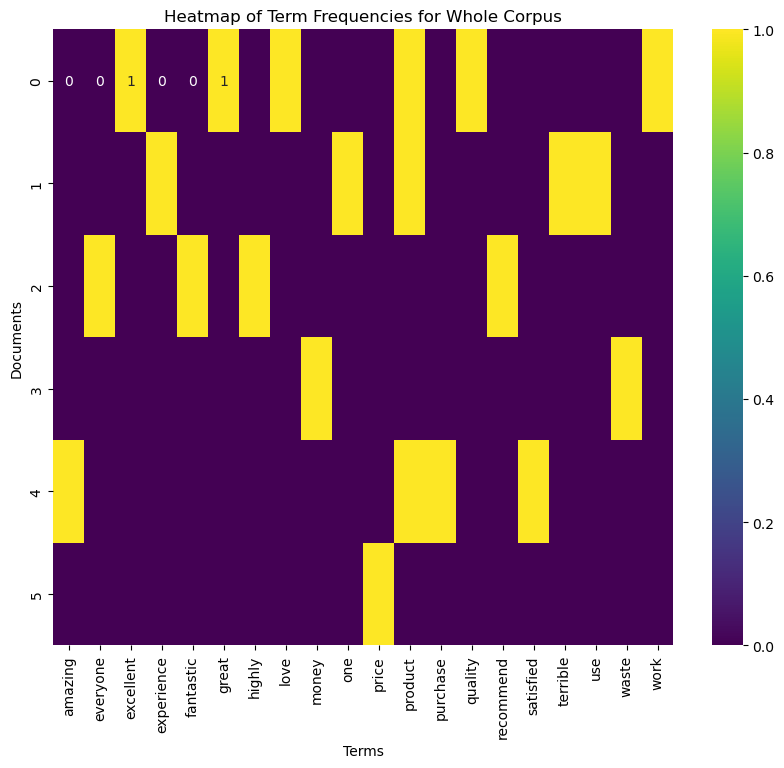

In [5]:
vectorizer = CountVectorizer(max_features=20)
X = vectorizer.fit_transform(df['preprocessed_text'])
term_freq_matrix = X.toarray()
terms = vectorizer.get_feature_names_out()

# Create Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(term_freq_matrix, xticklabels=terms, cmap='viridis', annot=True)
plt.title("Heatmap of Term Frequencies for Whole Corpus")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()

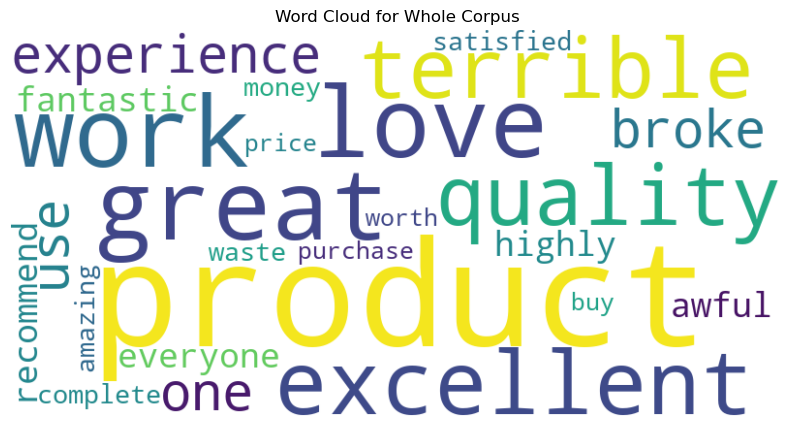

In [6]:
all_text = " ".join(df['preprocessed_text'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Whole Corpus")
plt.show()

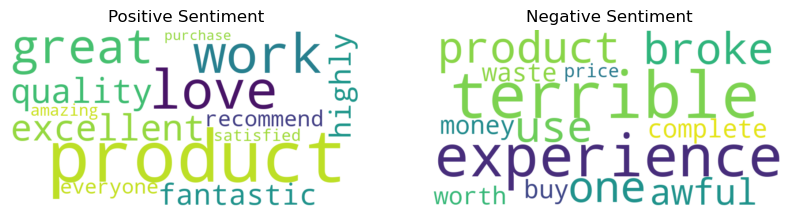

In [7]:
# Generate word cloud for positive sentiment
positive_text = ' '.join(df[df['category'] == 'Positive']['preprocessed_text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Generate word cloud for negative sentiment
negative_text = ' '.join(df[df['category'] == 'Negative']['preprocessed_text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word clouds
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.show()

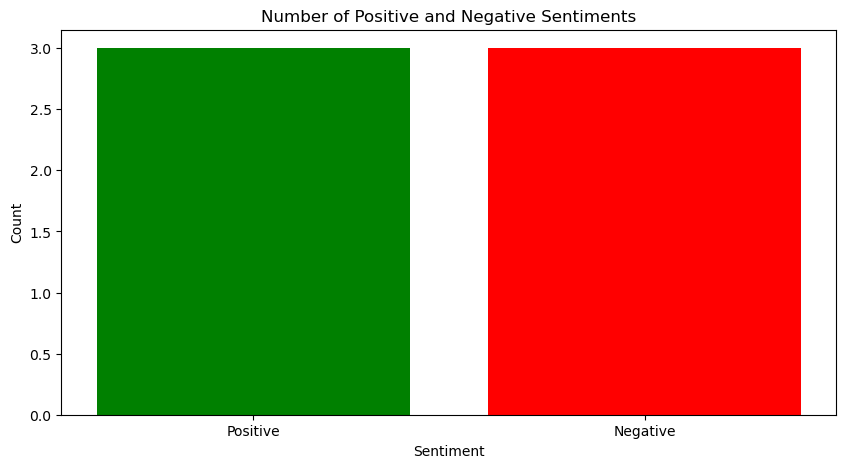

In [8]:
# Bar Chart of Sentiment Counts
sentiment_counts = df['category'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.title('Number of Positive and Negative Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()